In [3]:
import cv2
import numpy as np
import pandas as pd
import scipy.misc
from PIL import Image
from scipy import misc
import imageio
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# 处理这个尺寸的图像
# 如果更改此数字，则整个模型架构将更改，并且任何模型都需要重新训练

IMG_SIZE = 48
# 数据集标签和描述
CLASSES_DICT = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}
# 数据类别数
CLASSES_NUM = 7
# 样本数量
TRAIN_EXAMPLES_NUM = 10000
TEST_EXAMPLES_NUM = 3000
# 转化为 one hot 标签
ONE_HOT = False

# 测试集, 训练集存储路径
TRAIN_DATA_SRC = r"E:\DataBase\faceEmotion\_Modify\train1w.csv"
TEST_DATA_SRC = r"E:\DataBase\faceEmotion\_Modify\test3k.csv"


def load_data(src,
              mode,
              train_index=TRAIN_EXAMPLES_NUM,
              img_size=IMG_SIZE,
              one_hot=ONE_HOT,
              classes=CLASSES_NUM):
    """
    读取整合数据
    训练和测试数据不重复，数据内部不重复
    """

    images = np.array([], dtype=np.float32)
    labels = np.array([], dtype=np.float32)

    # 有第一行描述行，跳过 header
    data = pd.read_csv(src, header=0)

    # 0~28708  28709个训练 28709~35886  3589个测试
    if mode == "train":
        data_train = data[:train_index]
        labels = data_train["emotion"].values
        images = data_train["pixels"].str.split(" ").values
        images = np.concatenate(images)
    elif mode == "test":
        data_test = data[:train_index]
        labels = data_test["emotion"].values
        images = data_test["pixels"].str.split(" ").values
        images = np.concatenate(images)

    images = np.reshape(images, (-1, img_size**2))

    if one_hot:
        # 转换为 one hot 标签
        labels = pd.get_dummies(labels)
        labels = labels.values
        labels = np.reshape(labels, (-1, classes))

    # print("data shape:{}".format(images.shape))
    # print("label shape:{}".format(labels.shape))

    return images, labels

In [5]:
def next_batch(batch_size):
    batch_index=0
    """随机获得一批数据"""
    max_data = images.shape[0]

    if batch_index * batch_size > max_data:
        batch_index = 0

    if batch_index == 0:
        indices = np.arange(max_data)
        np.random.shuffle(indices)

    start_idx = batch_index * batch_size
    rand_x = images[start_idx:start_idx + batch_size]
    rand_y = labels[start_idx:start_idx + batch_size]

    return rand_x, rand_y

In [63]:
import numpy as np

# import get_data
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt



def kmeans(data,s2):
    s = KMeans(init='random', n_clusters=7).fit(data)
    
#     print(s)
    label_predict = s.labels_

    # print clf.cluster_centers_
    # 每个样本所属的簇
    # print(s.labels_)
    # 用来评估簇的个数是否合适距离越小说明簇分的越好
    print(f"inertia is {s.inertia_}")
    s1 = "inertia is " + str(s.inertia_) + s2
    logs(s1)
    return label_predict

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

### RUNNING

In [8]:
images, labels = load_data(TRAIN_DATA_SRC, "train", TRAIN_EXAMPLES_NUM, IMG_SIZE, ONE_HOT, CLASSES_NUM)

In [122]:
images.shape

(10000, 2304)

In [123]:
randx1, randy1 = next_batch(8000)

In [136]:
def getModel(): 
    model=Sequential()

    #Convolution blocks
    model.add(Conv2D(48, kernel_size = (3,3), 
                     padding='same',
                     input_shape=(48,48,1),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=2)) 

    model.add(Conv2D(64, kernel_size = (3,3), 
                     padding='same',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=2)) 

    model.add(Conv2D(32, kernel_size = (3,3), 
                     padding='same',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    #Classification layers
    model.add(Flatten())

    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu'))

    model.add(Dropout(0.2))
    model.add(Dense(7,activation='softmax'))
    return model

# model.summary()

In [130]:
floatData = floatData.reshape(8000,48,48)

In [131]:
floatData.shape

(8000, 48, 48)

In [124]:
type(randx1[2])
randx1.shape

(8000, 2304)

In [151]:
m1 = getModel()

In [150]:
EP = 50

In [153]:
m1.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
history = m1.fit(floatData, randy1, batch_size=1000, epochs=EP, shuffle=True, verbose=0,
              validation_split=0.1)

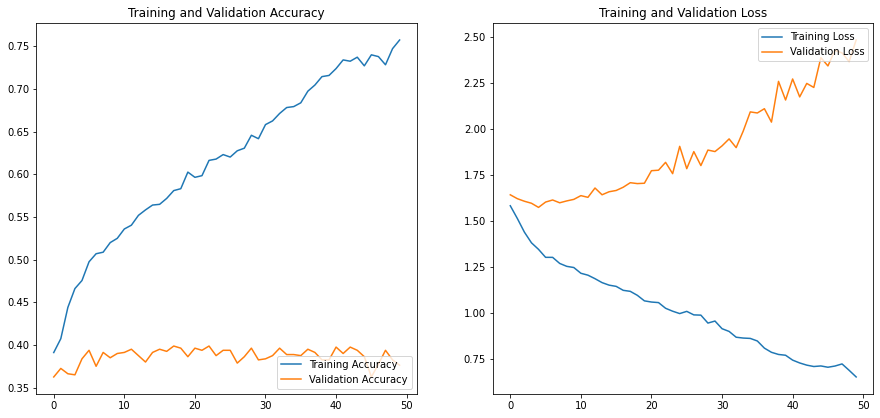

In [154]:
history = history.history
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(EP)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ========================================

In [18]:
s = type(randx1[2][2])

In [125]:
floatData = randx1.astype(np.float64)

In [79]:
type(randx1)

numpy.ndarray

In [77]:
accNum = 0
for i in range(len(randy1)):
    if(randy1[i]==label_predict[i]):
        accNum += 1
print('acc: %.2f'%(accNum/len(randy1)*100),'%')

acc: 13.80 %


In [73]:
label_predict[2]

1

In [76]:
label_predict = kmeans(floatData,' floatData')

inertia is 24311251979.987434


In [32]:
logsList = []

In [67]:
logsList.pop(0)

' 2022-09-29 23:01:29 inertia is 24309580861.235424'

In [38]:
def logs(info):
    tt = time.strftime(" %Y-%m-%d %H:%M:%S ", time.localtime())
    logsList.append(tt+info)

In [39]:
logs('这是第2个信息')

In [70]:
for log in logsList:
    print(log)

 2022-09-29 23:02:41 inertia is 24308381112.493477 floatData
 2022-09-29 23:03:16 inertia is 24309448350.106155 randx1


In [35]:
import time